In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime

from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [5]:
import pandas as pd

dataset = pd.read_csv('g.csv', low_memory=False)



In [7]:
dataset.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-2016 00:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-2016 01:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-2016 04:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-2016 07:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-2016 03:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [9]:
dataset.shape

(300698, 53)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [13]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [15]:
drop_columns = ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

dataset = dataset.drop(drop_columns, axis=1)

In [17]:
dataset.shape

(300698, 14)

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Status                  300698 non-null  object 
 10  Resolution Description  300698 non-null  object 
 11  Borough                 300698 non-null  object 
 12  Latitude                297158 non-null  float64
 13  Longitude               297158 non-null  float64
dtypes: float64(3), int64

In [21]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Status                       0
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [23]:
dataset = dataset.drop(['Status'], axis = 1)

In [25]:
dataset.shape

(300698, 13)

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              300698 non-null  int64  
 1   Created Date            300698 non-null  object 
 2   Closed Date             298534 non-null  object 
 3   Agency                  300698 non-null  object 
 4   Complaint Type          300698 non-null  object 
 5   Descriptor              294784 non-null  object 
 6   Location Type           300567 non-null  object 
 7   Incident Zip            298083 non-null  float64
 8   City                    298084 non-null  object 
 9   Resolution Description  300698 non-null  object 
 10  Borough                 300698 non-null  object 
 11  Latitude                297158 non-null  float64
 12  Longitude               297158 non-null  float64
dtypes: float64(3), int64(1), object(9)
memory usage: 29.8+ MB


In [31]:
dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date               2164
Agency                       0
Complaint Type               0
Descriptor                5914
Location Type              131
Incident Zip              2615
City                      2614
Resolution Description       0
Borough                      0
Latitude                  3540
Longitude                 3540
dtype: int64

In [33]:
dataset = dataset[(dataset['Location Type'].notnull()) & (dataset['Incident Zip'].notnull()) &(dataset['City'].notnull())]


dataset.isnull().sum()

Unique Key                   0
Created Date                 0
Closed Date                 56
Agency                       0
Complaint Type               0
Descriptor                5895
Location Type                0
Incident Zip                 0
City                         0
Resolution Description       0
Borough                      0
Latitude                   966
Longitude                  966
dtype: int64

In [35]:
dataset.shape

(297958, 13)

In [41]:
cols = ['Created Date', 'Closed Date']


for col in cols:
    dataset[col] = pd.to_datetime(dataset[col], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


dataset['Request_Closing_Time'] = dataset['Closed Date'] - dataset['Created Date']


dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297958 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype          
---  ------                  --------------   -----          
 0   Unique Key              297958 non-null  int64          
 1   Created Date            297958 non-null  datetime64[ns] 
 2   Closed Date             182014 non-null  datetime64[ns] 
 3   Agency                  297958 non-null  object         
 4   Complaint Type          297958 non-null  object         
 5   Descriptor              292063 non-null  object         
 6   Location Type           297958 non-null  object         
 7   Incident Zip            297958 non-null  float64        
 8   City                    297958 non-null  object         
 9   Resolution Description  297958 non-null  object         
 10  Borough                 297958 non-null  object         
 11  Latitude                296992 non-null  float64        
 12  Longitude            

In [43]:
dataset.describe()

,Unique Key,Created Date,Closed Date,Incident Zip,Latitude,Longitude,Request_Closing_Time
count,2.979580e+05,297958,182014,297958.000000,296992.000000,296992.000000,182014
mean,3.130115e+07,2015-08-14 09:59:11.950932992,2015-08-18 18:59:50.710851840,10848.838068,40.725888,-73.925628,0 days 04:20:15.027942905
min,3.027948e+07,2015-03-29 00:33:01,2015-03-29 00:57:23,83.000000,40.499135,-74.254937,0 days 00:02:26
25%,3.080144e+07,2015-06-08 20:31:15,2015-06-16 20:37:16,10310.000000,40.669791,-73.972117,0 days 01:17:08.250000
50%,3.130592e+07,2015-08-13 21:33:02,2015-08-20 08:36:19,11208.000000,40.718663,-73.931780,0 days 02:43:48
75%,3.178661e+07,2015-10-19 07:24:49,2015-10-22 22:32:56.500000,11238.000000,40.781878,-73.876815,0 days 05:22:17
max,3.231065e+07,2015-12-31 23:59:45,2015-12-31 23:54:36,11697.000000,40.912869,-73.700760,24 days 16:52:22
std,5.742340e+05,NaN,NaN,583.206329,0.082016,0.078446,0 days 06:10:41.664430554


In [45]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'City',
       'Resolution Description', 'Borough', 'Latitude', 'Longitude',
       'Request_Closing_Time'],
      dtype='object')

In [47]:
dataset['Agency'].value_counts()


Agency
NYPD    297958
Name: count, dtype: int64

In [49]:
dataset['Complaint Type'].value_counts()

Complaint Type
Blocked Driveway             76724
Illegal Parking              74283
Noise - Street/Sidewalk      47991
Noise - Commercial           35194
Derelict Vehicle             17539
Noise - Vehicle              17026
Animal Abuse                  7764
Traffic                       4489
Homeless Encampment           4405
Noise - Park                  4015
Vending                       3793
Drinking                      1271
Noise - House of Worship       927
Posting Advertisement          648
Urinating in Public            591
Bike/Roller/Skate Chronic      422
Panhandling                    305
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Squeegee                         4
Name: count, dtype: int64

<Axes: title={'center': 'Complaint Types'}, xlabel='Complaint Type', ylabel='Count'>

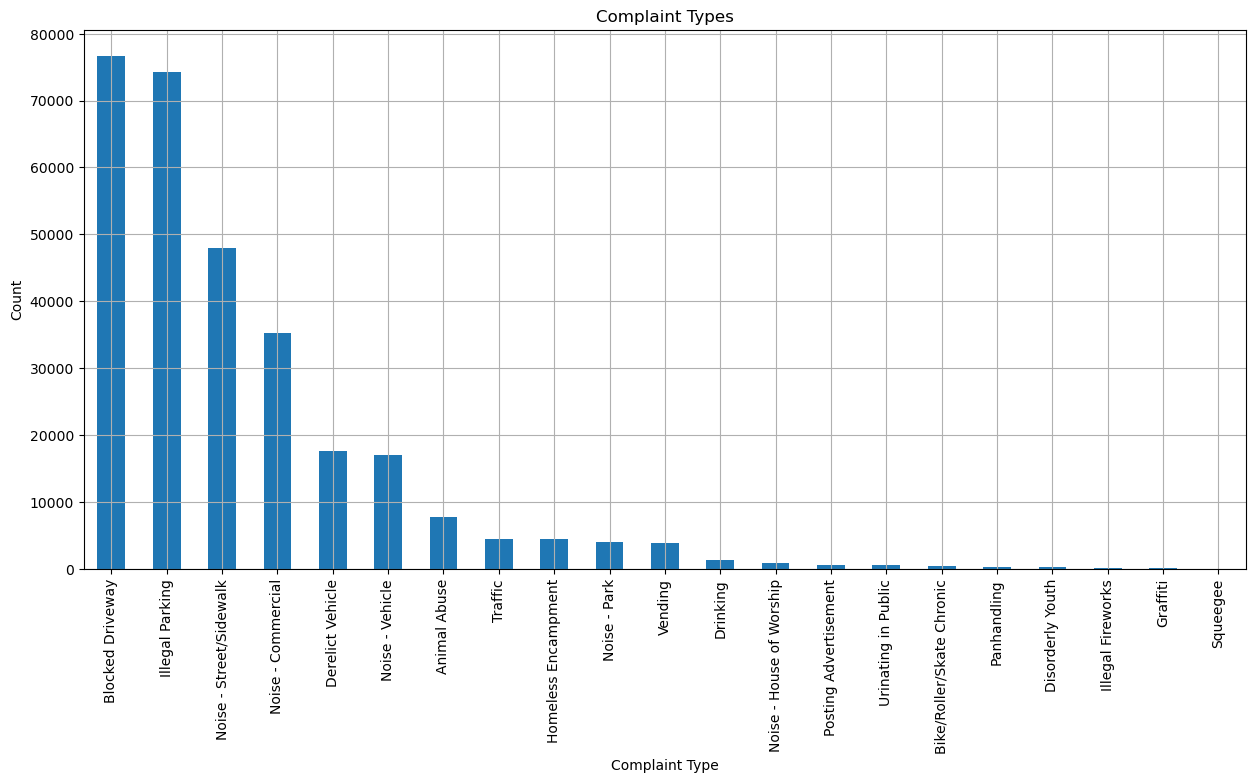

In [51]:
dataset['Complaint Type'].value_counts().plot(kind = 'bar', figsize=(15, 7), title='Complaint Types', ylabel='Count', grid=True)

In [53]:
dataset['Descriptor'].value_counts()

Descriptor
Loud Music/Party                  60736
No Access                         56765
Posted Parking Sign Violation     22195
Loud Talking                      21346
Partial Access                    19959
With License Plate                17539
Blocked Hydrant                   15851
Commercial Overnight Parking      11926
Car/Truck Music                   11217
Blocked Sidewalk                  10950
Double Parked Blocking Traffic     5605
Double Parked Blocking Vehicle     4207
Engine Idling                      4177
Banging/Pounding                   4094
Neglected                          3779
Car/Truck Horn                     3490
Congestion/Gridlock                2753
In Prohibited Area                 2022
Other (complaint details)          1967
Unlicensed                         1771
Overnight Commercial Storage       1753
Unauthorized Bus Layover           1335
Truck Route Violation              1013
In Public                           924
Tortured                     

<Axes: title={'center': 'Top 10 Descriptors'}, ylabel='Descriptor'>

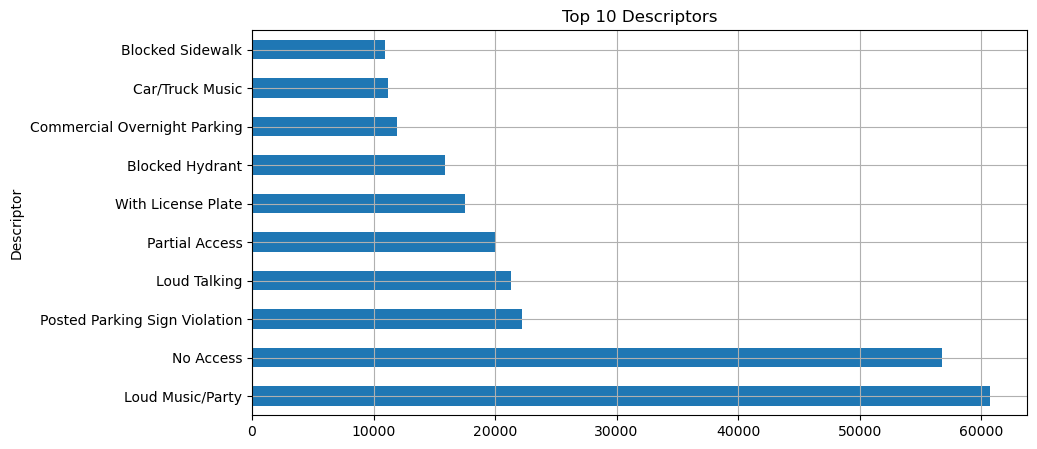

In [55]:
dataset['Descriptor'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10,5), title='Top 10 Descriptors')

In [57]:
dataset['Location Type'].value_counts().head(10)

Location Type
Street/Sidewalk               247116
Store/Commercial               20142
Club/Bar/Restaurant            17220
Residential Building/House      6953
Park/Playground                 4744
House of Worship                 927
Residential Building             227
Highway                          210
Parking Lot                      117
House and Store                   93
Name: count, dtype: int64

<Axes: title={'center': 'Top 10 Location Type'}, ylabel='Location Type'>

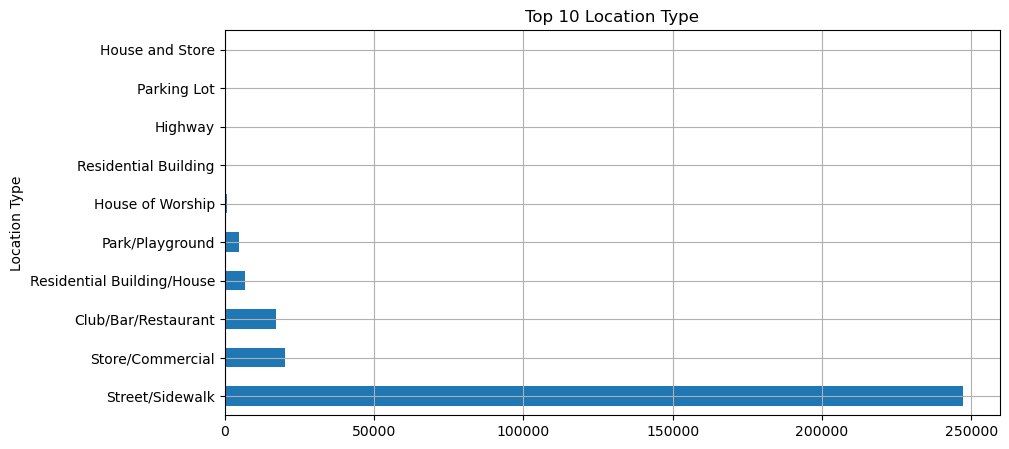

In [59]:
dataset['Location Type'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Top 10 Location Type')

In [61]:
dataset['City'].value_counts().head(10)

City
BROOKLYN         98263
NEW YORK         65978
BRONX            40686
STATEN ISLAND    12337
JAMAICA           7288
ASTORIA           6330
FLUSHING          5966
RIDGEWOOD         5163
CORONA            4293
WOODSIDE          3541
Name: count, dtype: int64

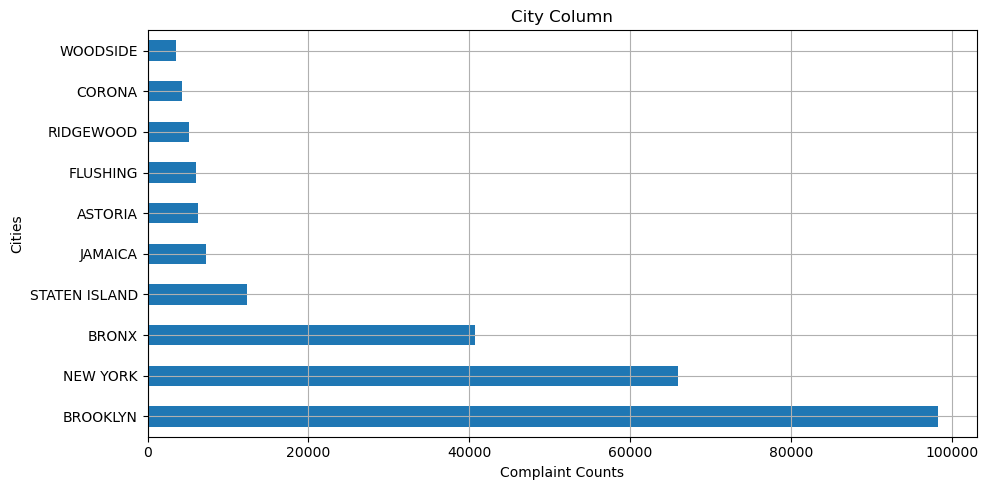

In [65]:
import matplotlib.pyplot as plt


dataset['City'].value_counts().head(10).plot(
    kind='barh',
    grid=True,
    figsize=(10, 5),
    title='City Column',
    ylabel='Cities'
)

plt.xlabel('Complaint Counts')
plt.tight_layout()  
plt.show()


Text(0.5, 0, 'Complaint Counts')

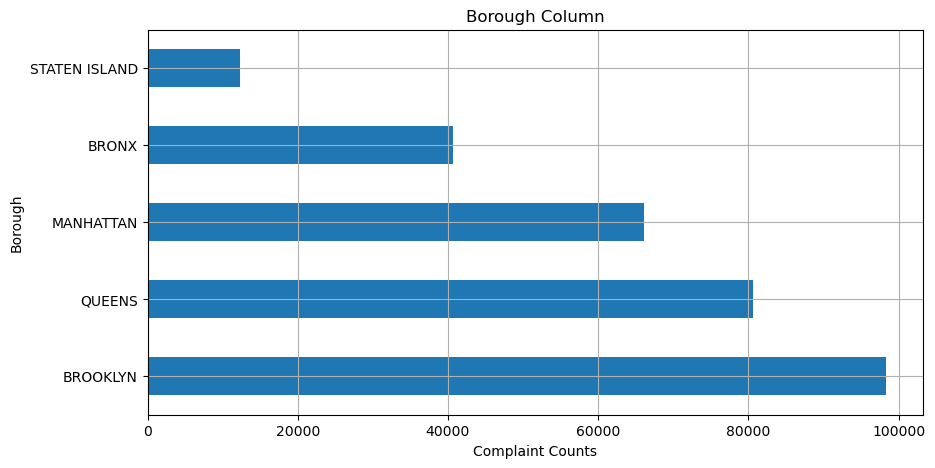

In [67]:
dataset['Borough'].value_counts().head(10).plot(kind='barh', grid=True, figsize=(10, 5), title='Borough Column', ylabel='Borough')
plt.xlabel('Complaint Counts')

In [69]:
top_6_complaints = dataset['Complaint Type'].value_counts()[:6].keys()
top_6_complaints

Index(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle'],
      dtype='object', name='Complaint Type')

In [71]:
borough_complaints = dataset.groupby(['Borough', 'Complaint Type']).size().unstack()
borough_complaints = borough_complaints[top_6_complaints]
borough_complaints

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Street/Sidewalk,Noise - Commercial,Derelict Vehicle,Noise - Vehicle
Borough,,,,,,
BRONX,12751.0,7855.0,8891.0,2434.0,1952.0,3395.0
BROOKLYN,28131.0,27447.0,13354.0,11462.0,5178.0,5176.0
MANHATTAN,2071.0,12128.0,20527.0,14548.0,537.0,5484.0
QUEENS,31629.0,21970.0,4400.0,6072.0,8108.0,2615.0
STATEN ISLAND,2142.0,4883.0,819.0,678.0,1764.0,356.0


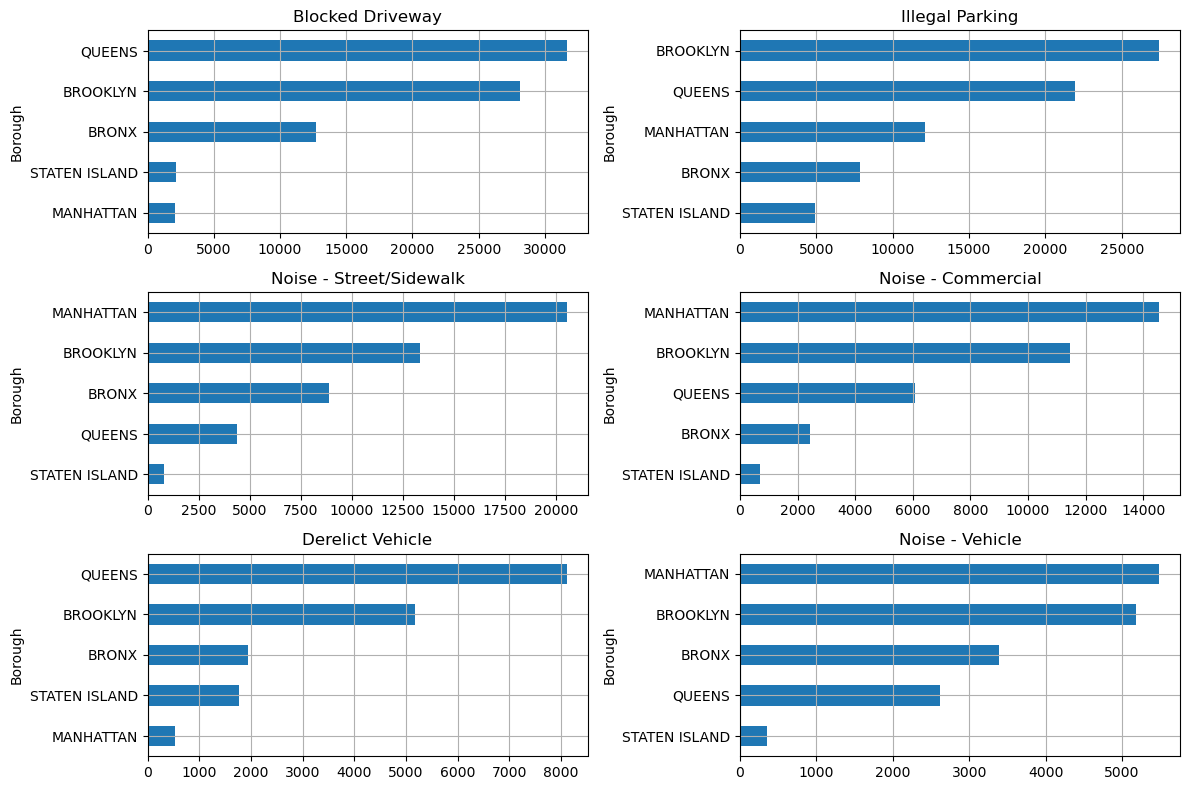

In [75]:
import matplotlib.pyplot as plt

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 8))


for i, (label, col) in enumerate(borough_complaints.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)

plt.tight_layout()
plt.show()


In [77]:
top_borough = dataset['Borough'].value_counts().keys()

complaint_per_borough = dataset.groupby(['Complaint Type', 'Borough']).size().unstack()
complaint_per_borough = complaint_per_borough[top_borough]
complaint_per_borough

Borough,BROOKLYN,QUEENS,MANHATTAN,BRONX,STATEN ISLAND
Complaint Type,,,,,
Animal Abuse,2393.0,1875.0,1525.0,1414.0,557.0
Bike/Roller/Skate Chronic,111.0,59.0,225.0,20.0,7.0
Blocked Driveway,28131.0,31629.0,2071.0,12751.0,2142.0
Derelict Vehicle,5178.0,8108.0,537.0,1952.0,1764.0
Disorderly Youth,72.0,59.0,69.0,63.0,23.0
Drinking,257.0,357.0,295.0,187.0,175.0
Graffiti,43.0,37.0,22.0,9.0,2.0
Homeless Encampment,854.0,463.0,2772.0,245.0,71.0
Illegal Fireworks,61.0,37.0,36.0,24.0,10.0


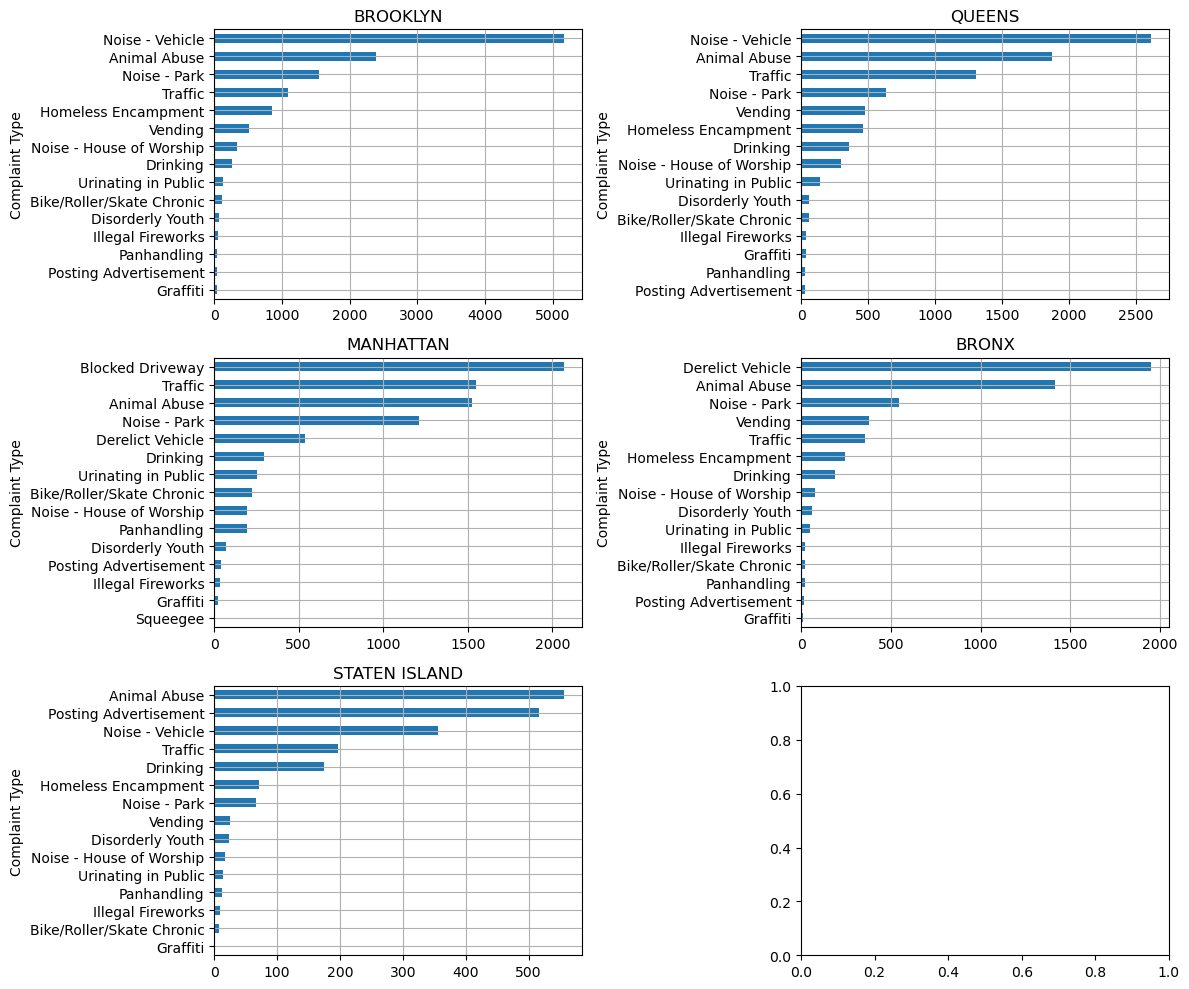

In [81]:
import matplotlib.pyplot as plt

col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number, col_number, figsize=(12, 10))

# Replace .iteritems() with .items()
for i, (label, col) in enumerate(complaint_per_borough.items()):
    ax = axes[int(i / col_number), i % col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax, grid=True)
    ax.set_title(label)

plt.tight_layout()
plt.show()


In [97]:
import numpy as np
dataset['Request_Closing_Time_in_Hours'] = (
    dataset['Request_Closing_Time'].dt.total_seconds() / 3600
).apply(np.ceil)
print(dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours']].head(20))


   Request_Closing_Time  Request_Closing_Time_in_Hours
0                   NaT                            NaN
1                   NaT                            NaN
2                   NaT                            NaN
3                   NaT                            NaN
4                   NaT                            NaN
5                   NaT                            NaN
6                   NaT                            NaN
7                   NaT                            NaN
8                   NaT                            NaN
9                   NaT                            NaN
10                  NaT                            NaN
11                  NaT                            NaN
12                  NaT                            NaN
13                  NaT                            NaN
14                  NaT                            NaN
15                  NaT                            NaN
16                  NaT                            NaN
17        

In [99]:
data_avg_time_in_hrs = dataset.groupby(['City', 'Complaint Type'])['Request_Closing_Time_in_Hours'].mean()
data_avg_time_in_hrs.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse                2.750000
         Blocked Driveway            2.571429
         Derelict Vehicle            3.750000
         Disorderly Youth            4.000000
         Drinking                    1.000000
         Graffiti                         NaN
         Homeless Encampment         2.333333
         Illegal Parking             2.960000
         Noise - Commercial          3.000000
         Noise - House of Worship    2.222222
Name: Request_Closing_Time_in_Hours, dtype: float64

In [101]:
dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].astype('timedelta64[s]')
dataset[['Request_Closing_Time', 'Request_Closing_Time_in_Hours','Request_Closing_Time_in_Seconds']].head()

,Request_Closing_Time,Request_Closing_Time_in_Hours,Request_Closing_Time_in_Seconds
0,NaT,NaN,NaT
1,NaT,NaN,NaT
2,NaT,NaN,NaT
3,NaT,NaN,NaT
4,NaT,NaN,NaT


In [103]:
data_avg_in_seconds = dataset.groupby(['City', 'Complaint Type']).Request_Closing_Time_in_Seconds.mean()
data_avg_in_seconds.head(10)

City     Complaint Type          
ARVERNE  Animal Abuse               0 days 02:18:00
         Blocked Driveway           0 days 02:05:15
         Derelict Vehicle           0 days 03:21:24
         Disorderly Youth           0 days 03:35:28
         Drinking                   0 days 00:14:19
         Graffiti                               NaT
         Homeless Encampment        0 days 01:49:31
         Illegal Parking            0 days 02:29:08
         Noise - Commercial         0 days 02:17:14
         Noise - House of Worship   0 days 01:41:40
Name: Request_Closing_Time_in_Seconds, dtype: timedelta64[s]

In [105]:
dataset['Request_Closing_Time'].describe()


count                       180172
mean     0 days 04:17:14.918250338
std      0 days 05:50:29.851797721
min                0 days 00:02:26
25%                0 days 01:16:29
50%                0 days 02:42:24
75%                0 days 05:19:21
max               24 days 16:52:22
Name: Request_Closing_Time, dtype: object

In [109]:

mean_hrs = dataset['Request_Closing_Time_in_Hours'].mean()
std_hrs = dataset['Request_Closing_Time_in_Hours'].std()


dataset['Request_Closing_Time_in_Seconds'] = dataset['Request_Closing_Time'].dt.total_seconds()
mean_seconds = dataset['Request_Closing_Time_in_Seconds'].mean()
std_seconds = dataset['Request_Closing_Time_in_Seconds'].std()


print('The mean hours is {:.2f} hours and mean seconds is {:.2f} seconds'.format(mean_hrs, mean_seconds))
print('The standard deviation is {:.2f} hours and {:.2f} seconds'.format(std_hrs, std_seconds))


The mean hours is 4.79 hours and mean seconds is 15434.92 seconds
The standard deviation is 5.84 hours and 21029.85 seconds


In [113]:

dataset['Created Date'] = pd.to_datetime(dataset['Created Date'])

dataset['Year-Month'] = dataset['Created Date'].dt.strftime('%Y-%m')

print(dataset['Year-Month'].unique())


['2015-12' nan '2015-11' '2015-10' '2015-09' '2015-08' '2015-07' '2015-06'
 '2015-05' '2015-04' '2015-03']


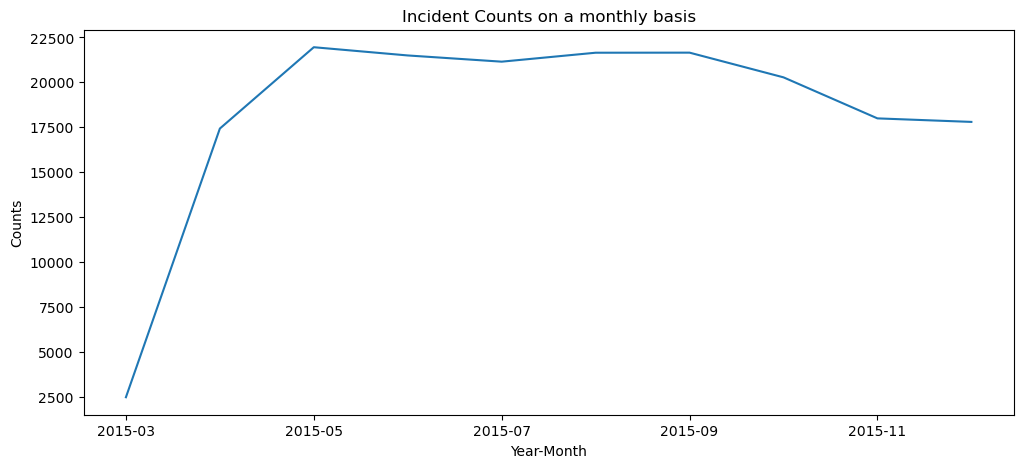

In [117]:
monthly_incidents =  dataset.groupby('Year-Month').size().plot(figsize=(12,5),
title='Incident Counts on a monthly basis', ylabel='Counts')

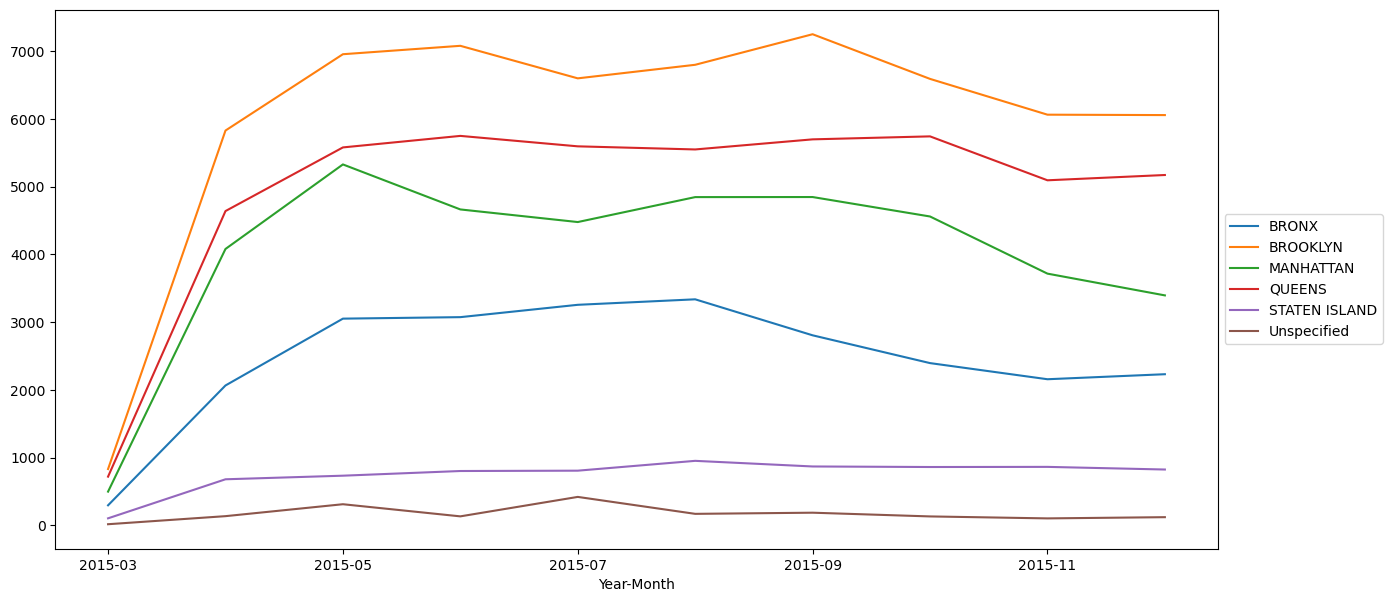

In [119]:
dataset.groupby(['Year-Month','Borough']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

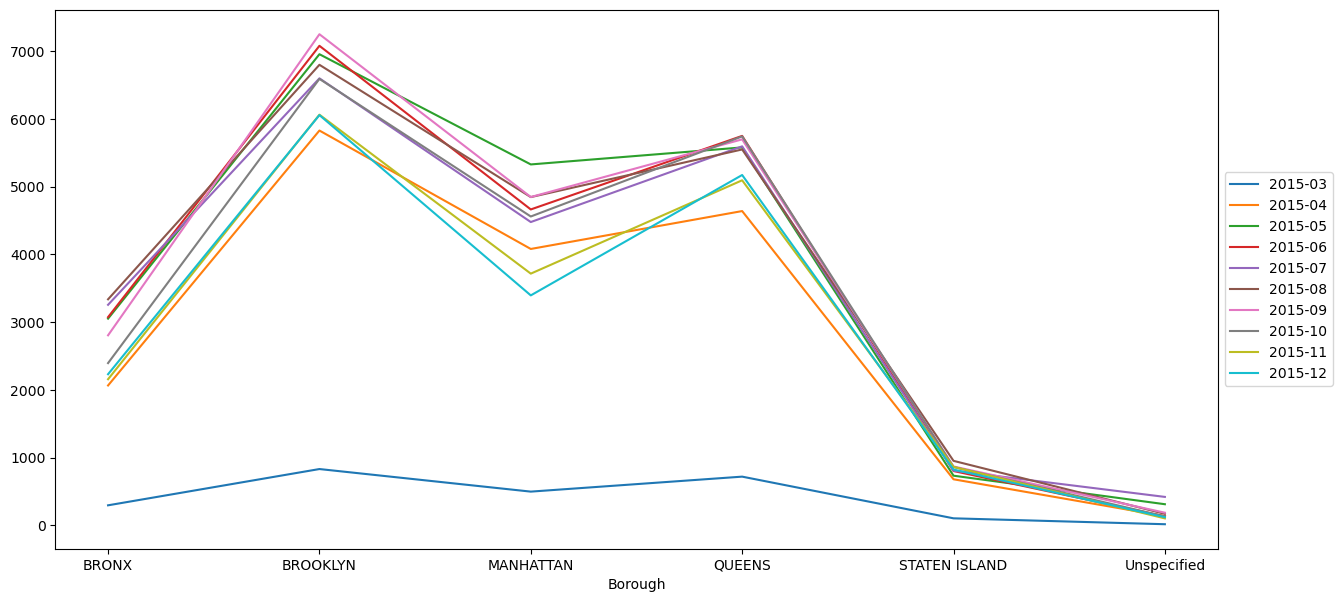

In [121]:
dataset.groupby(['Borough', 'Year-Month']).size().unstack().plot(figsize=(15,7))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

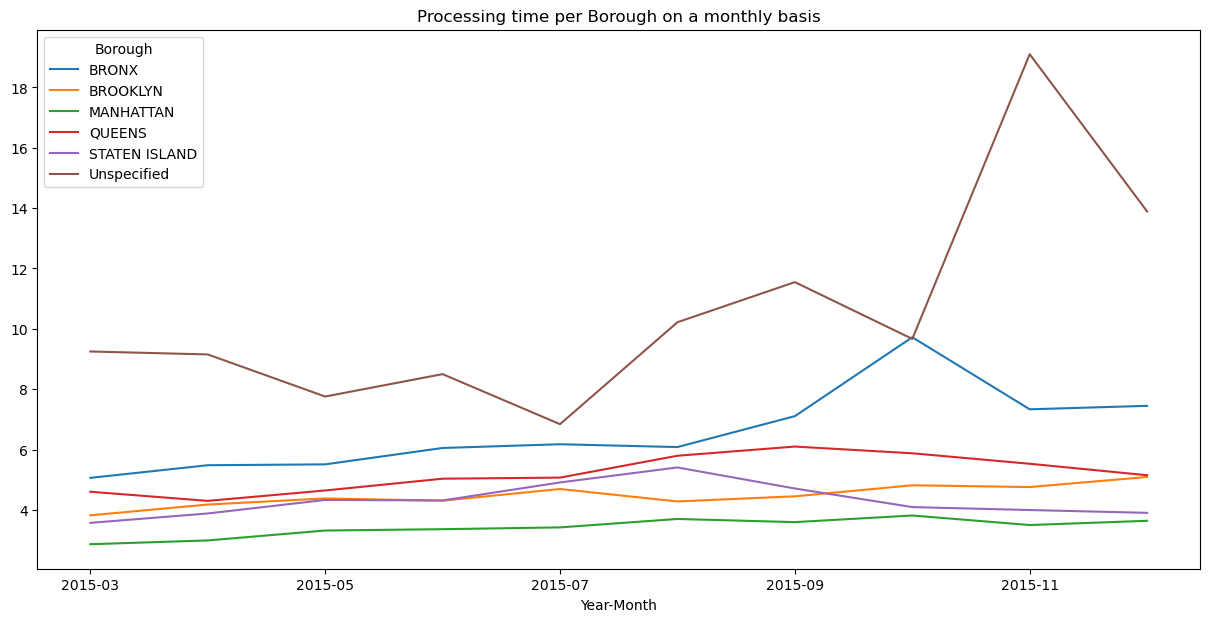

In [123]:
dataset.groupby(['Year-Month','Borough'])['Request_Closing_Time_in_Hours'].mean().unstack().plot(figsize=(15,7),
title='Processing time per Borough on a monthly basis');

In [125]:
dataset.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [127]:
avg_response_time = dataset.groupby(['Complaint Type']).Request_Closing_Time_in_Seconds.mean().sort_values(ascending=True)
avg_response_time

Complaint Type
Posting Advertisement         6428.174263
Illegal Fireworks             9625.732143
Noise - House of Worship     10872.770318
Noise - Commercial           11344.178919
Urinating in Public          11420.592798
Noise - Park                 11966.134106
Traffic                      12170.989996
Agency Issues                12280.750000
Noise - Street/Sidewalk      12615.853114
Disorderly Youth             12768.769634
Noise - Vehicle              13060.323682
Panhandling                  13175.604278
Drinking                     13887.902975
Bike/Roller/Skate Chronic    13917.090909
Squeegee                     14338.500000
Vending                      14484.144407
Homeless Encampment          15307.907116
Illegal Parking              15912.566557
Blocked Driveway             16972.631508
Animal Abuse                 18509.032586
Graffiti                     24187.257576
Derelict Vehicle             26084.858422
Animal in a Park                      NaN
Ferry Complaint    

In [131]:
data = {}
for complaint in dataset['Complaint Type'].unique():
    data[complaint] = np.log(dataset[dataset['Complaint Type']==complaint]['Request_Closing_Time_in_Seconds'])

In [133]:
data.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

In [135]:
for complaint in data.keys():
    print(data[complaint].std())

1.1007065861825338
0.9761583638122692
1.0748506959894388
1.2488314186528349
1.0937777238029531
1.132887767476304
1.2615911757622296
1.0784541267822356
1.0417888613091146
1.1322240251675393
1.1676203937747813
1.0501198241036425
1.1638457871935681
1.028272550731391
1.1043173035464322
1.0206198192464362
1.0379435849639171
1.0901451014458825
1.053086187380172
1.2256232954490824
nan
0.7365214717194876
1.2375442968996526
nan


In [137]:
from scipy.stats import f_oneway

stat, p = f_oneway(data['Blocked Driveway'], data['Illegal Parking'], data['Noise - Street/Sidewalk'],
                   data['Derelict Vehicle'], data['Noise - Commercial'])
print('Statistics= %.3f, p = %.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('We have Different distributions (reject H0)')

Statistics= nan, p = nan
We have Different distributions (reject H0)


In [139]:
city_type = pd.crosstab(dataset['City'], dataset['Complaint Type'])

In [141]:
city_type.head()

Complaint Type,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,Illegal Fireworks,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,38,0,0,35,27,2,1,1,4,0,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,125,0,15,2618,351,3,35,4,32,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,116,12,0,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,37,0,0,377,198,1,1,3,2,0,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,7,0,1,95,89,2,1,0,1,1,...,1,1,13,10,1,1,0,7,1,0


In [147]:
from scipy.stats import chi2_contingency


table = city_type
stat, p, dof, expected = chi2_contingency(table)


print('The Degrees of Freedom are : {}'. format(dof))
print('The P-Value of the Testing is {}: '.format(p))
print('Expected values : \n')
print(expected)

The Degrees of Freedom are : 1092
The P-Value of the Testing is 0.0: 
Expected values : 

[[5.73241100e+00 7.38046993e-04 3.11455831e-01 ... 3.31752124e+00
  4.36923820e-01 2.80088834e+00]
 [1.64937098e+02 2.12356249e-02 8.96143369e+00 ... 9.54541337e+01
  1.25714899e+01 8.05891963e+01]
 [1.86824486e+01 2.40536225e-03 1.01506287e+00 ... 1.08121033e+01
  1.42397445e+00 9.12834973e+00]
 ...
 [6.42030032e+01 8.26612633e-03 3.48830531e+00 ... 3.71562378e+01
  4.89354679e+00 3.13699494e+01]
 [9.23439299e+01 1.18892661e-02 5.01727030e+00 ... 5.34422512e+01
  7.03844554e+00 4.51197649e+01]
 [3.12676964e+00 4.02571087e-04 1.69884999e-01 ... 1.80955704e+00
  2.38322084e-01 1.52775728e+00]]


In [151]:
from scipy.stats import chi2
prob = 0.95 
critical_value = chi2.ppf(prob, dof)
critical_value

1169.989538584286

In [153]:
print('Probability = {}, Critical Value = {}, Test statistic = {}'.format(prob, critical_value, stat))
print()
if abs(stat) >= critical_value:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')



alpha = 1 - prob
print('Significance : %.3f, P-Value : %.2f'%(alpha, p))
if p <= alpha:
    print('Dependent (Reject H0 or Null Hypothesis)')
else:
    print('Independent (Failed to reject Null Hypothesis)')

Probability = 0.95, Critical Value = 1169.989538584286, Test statistic = 119769.34666374496

Dependent (Reject H0 or Null Hypothesis)
Significance : 0.050, P-Value : 0.00
Dependent (Reject H0 or Null Hypothesis)
